In [87]:
import os

from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

from yellowbrick.classifier import ClassificationReport

In [88]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [89]:
import pandas as pd
import numpy as np

In [90]:
import warnings
warnings.filterwarnings('ignore')

In [91]:
from sklearn.compose import make_column_selector
categorical = make_column_selector(dtype_include=np.object)
numeric = make_column_selector(dtype_include=np.int64)
numeric2 = make_column_selector(dtype_include=np.float64)

In [92]:
df = pd.read_csv('s3://covidstatedata/final_dataset.csv')
pd.set_option("display.max_columns", None)

df1 = df.dropna()

In [93]:
X = df1[['% Vaccinated', '80th Percentile Income', '20th Percentile Income', 
        'Income Ratio', 'Median Household Income', 'Population', 
        '% Less Than 18 Years of Age', '% 65 and Over', '% Black', '% American Indian & Alaska Native', 
        '% Asian', '% Native Hawaiian/Other Pacific Islander', '% Hispanic', '% Non-Hispanic White', 
        '% Female', '% Rural', 'Series_Complete_Pop_Pct', 'Series_Complete_12PlusPop_Pct', 'Series_Complete_18PlusPop_Pct',
        'Series_Complete_65PlusPop_Pct', 'Completeness_pct', 
        '# Black', '# American Indian & Alaska Native', '# Asian', '# Native Hawaiian/Other Pacific Islander', 
         '# Hispanic', '# Non-Hispanic White', '# Rural', 'Series_Complete_Yes', 'Series_Complete_12Plus', 
         'Series_Complete_18Plus', 'Series_Complete_65Plus']]

#'Life Expectancy', #potentially temporarily removed due to data imputation need
y = df1['Dem0_Rep1']

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3048 entries, 0 to 3047
Data columns (total 45 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                3048 non-null   int64  
 1   FIPS                                      3048 non-null   int64  
 2   state                                     3048 non-null   object 
 3   county                                    3048 non-null   object 
 4   % Vaccinated                              3048 non-null   float64
 5   80th Percentile Income                    3048 non-null   float64
 6   20th Percentile Income                    3048 non-null   float64
 7   Income Ratio                              3048 non-null   float64
 8   Life Expectancy                           3048 non-null   float64
 9   Median Household Income                   3048 non-null   float64
 10  Population                          

In [95]:
from sklearn.pipeline import Pipeline
from yellowbrick.classifier import ClassificationReport
def score_model_test(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    #setup pipeline for onehotcoder and scalar
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', RobustScaler(), numeric),
        ('scalar2', RobustScaler(), numeric2),
    ], remainder='drop')),
    ('estimator', estimator)
])

    
    
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, random_state=11)
    
    model.fit(X_train, y_train)  
    
    
    # Instantiate the classification model and visualizer

    expected  = y_test
    predicted = model.predict(X_test)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("F1 SCORE {}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))
    print(model.score(X_test, y_test))
    
    
def visualize_model_split(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', RobustScaler(), numeric),
        ('scalar2', RobustScaler(), numeric2),
    ], remainder='drop')),
    ('estimator', estimator)
])

    # Instantiate the classification model and visualizer, can change for any visualizer in Yellow Brick
    visualizer = ClassificationReport(
        model, classes=['D', 'R'],
        cmap="YlGn", size=(600, 360), **kwargs
    )
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, random_state=11)
    
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)
    visualizer.show()  

In [96]:
from sklearn.pipeline import Pipeline
from yellowbrick.classifier import ClassificationReport
def minmaxscore(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    #setup pipeline for onehotcoder and scalar
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', MinMaxScaler(), numeric),
        ('scalar2', RobustScaler(), numeric2),
    ], remainder='drop')),
    ('estimator', estimator)
])

    
    
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, random_state=11)
    
    model.fit(X_train, y_train)  
    
    
    # Instantiate the classification model and visualizer

    expected  = y_test
    predicted = model.predict(X_test)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("F1 SCORE {}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))
    print(model.score(X_test, y_test))
    
def visualizeminmax(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', MinMaxScaler(), numeric),
        ('scalar2', RobustScaler(), numeric2),
    ], remainder='drop')),
    ('estimator', estimator)
])

    # Instantiate the classification model and visualizer, can change for any visualizer in Yellow Brick
    visualizer = ClassificationReport(
        model, classes=['D', 'R'],
        cmap="YlGn", size=(600, 360), **kwargs
    )
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, random_state=11)
    
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)
    visualizer.show()  

In [97]:
from sklearn.pipeline import Pipeline
from yellowbrick.classifier import ClassificationReport
def minmaxscoreall(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    #setup pipeline for onehotcoder and scalar
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', MinMaxScaler(), numeric),
        ('scalar2', MinMaxScaler(), numeric2),
    ], remainder='drop')),
    ('estimator', estimator)
])

    
    
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, random_state=11)
    
    model.fit(X_train, y_train)  
    
    
    # Instantiate the classification model and visualizer

    expected  = y_test
    predicted = model.predict(X_test)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("F1 SCORE {}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))
    print(model.score(X_test, y_test))
    
def visualizeminmaxall(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', MinMaxScaler(), numeric),
        ('scalar2', MinMaxScaler(), numeric2),
    ], remainder='drop')),
    ('estimator', estimator)
])

    # Instantiate the classification model and visualizer, can change for any visualizer in Yellow Brick
    visualizer = ClassificationReport(
        model, classes=['D', 'R'],
        cmap="YlGn", size=(600, 360), **kwargs
    )
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, random_state=11)
    
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)
    visualizer.show()  

# Comparing MinMax to Robust

F1 SCORE SVC: 0.9458955223880596
0.9049180327868852


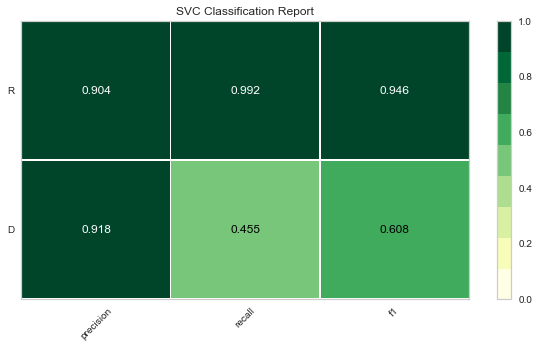

F1 SCORE LinearSVC: 0.9651837524177949
0.940983606557377


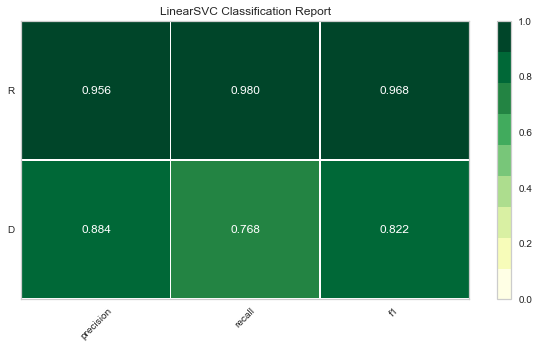

F1 SCORE SGDClassifier: 0.9592233009708738
0.9311475409836065


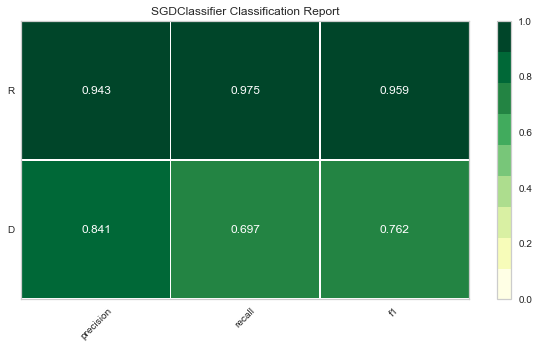

F1 SCORE KNeighborsClassifier: 0.9547641963426371
0.9229508196721311


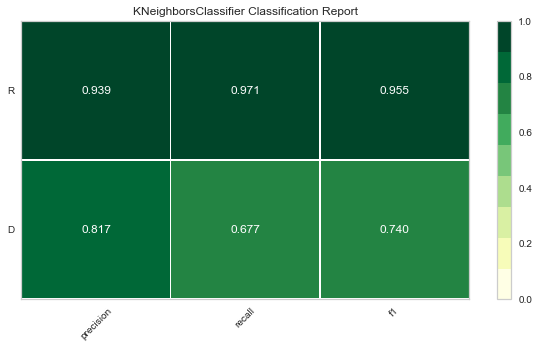

F1 SCORE LogisticRegression: 0.9679300291545189
0.9459016393442623


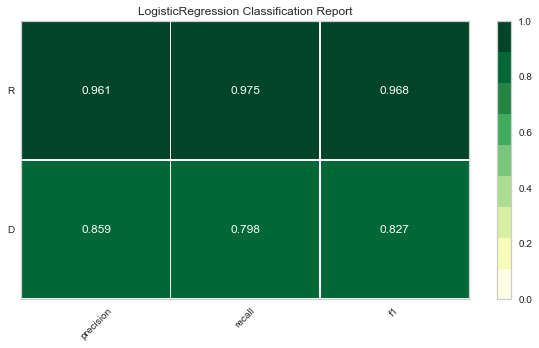

F1 SCORE LogisticRegressionCV: 0.9659863945578231
0.9426229508196722


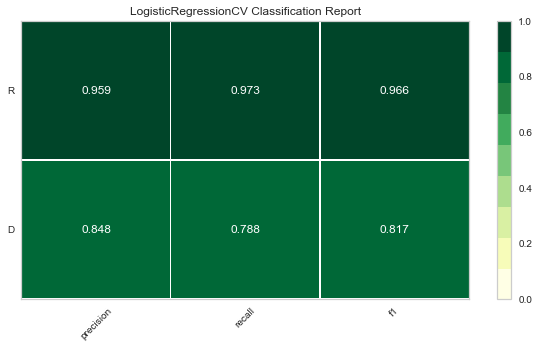

F1 SCORE BaggingClassifier: 0.9638318670576734
0.9393442622950819


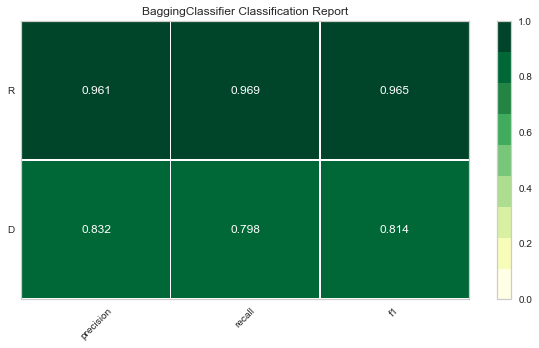

F1 SCORE ExtraTreesClassifier: 0.9688715953307393
0.9475409836065574


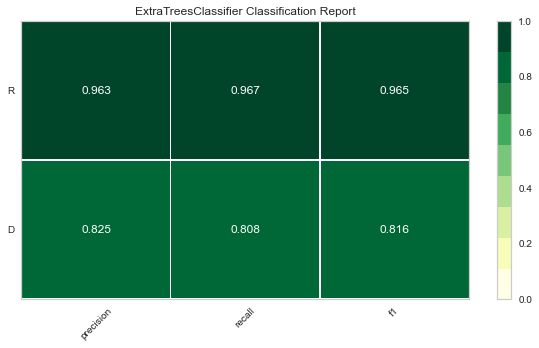

F1 SCORE RandomForestClassifier: 0.96
0.9327868852459016


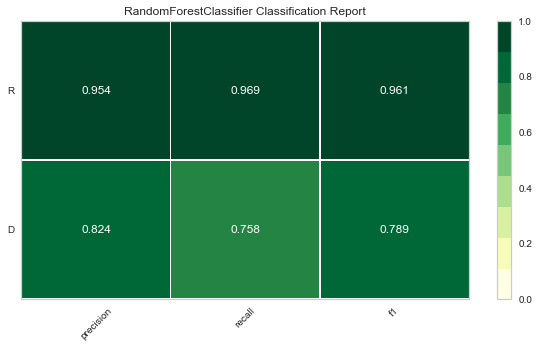

In [98]:
models = [
    SVC(), LinearSVC(), 
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(), 
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3), 
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=10), 
    RandomForestClassifier(n_estimators=10)
]
#Robust Scaler

#Wins on Logistic + Random Forest
for model in models:
    score_model_test(X, y, model)
    visualize_model_split(X, y, model)

F1 SCORE SVC: 0.9597701149425287
0.9311475409836065


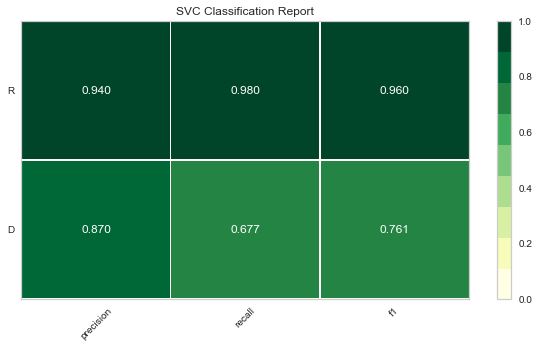

F1 SCORE LinearSVC: 0.9718719689621726
0.9524590163934427


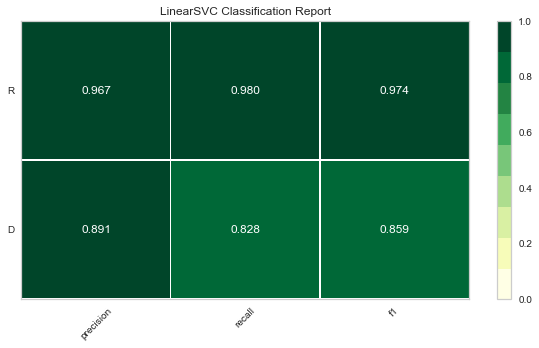

F1 SCORE SGDClassifier: 0.9643201542912246
0.9393442622950819


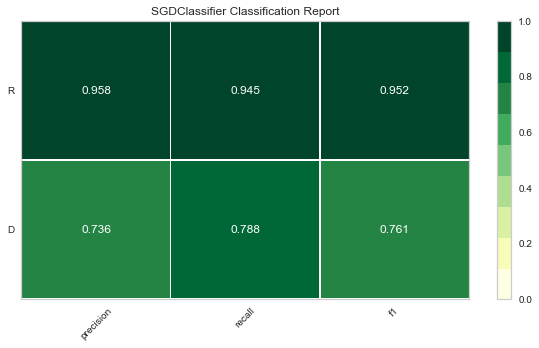

F1 SCORE KNeighborsClassifier: 0.9540229885057472
0.921311475409836


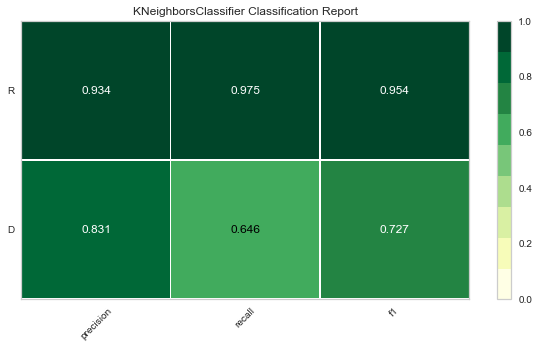

F1 SCORE LogisticRegression: 0.9688715953307393
0.9475409836065574


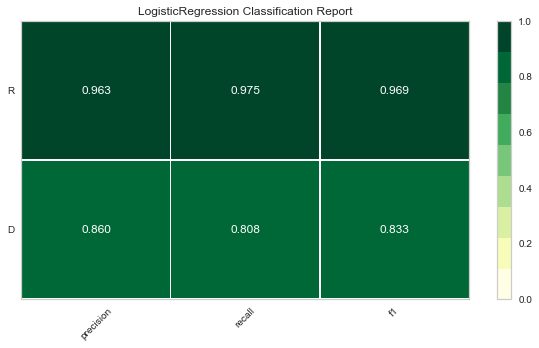

F1 SCORE LogisticRegressionCV: 0.9689320388349515
0.9475409836065574


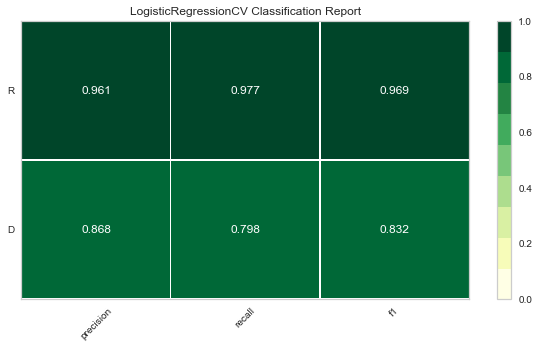

F1 SCORE BaggingClassifier: 0.962172647914646
0.9360655737704918


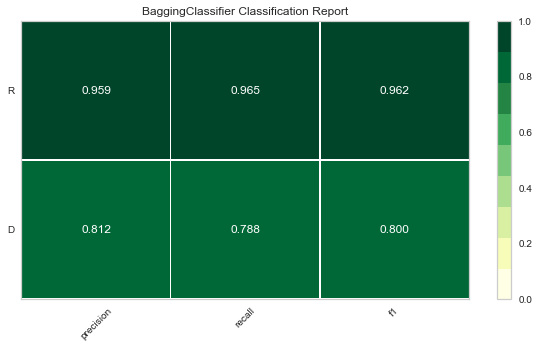

F1 SCORE ExtraTreesClassifier: 0.9560975609756098
0.9262295081967213


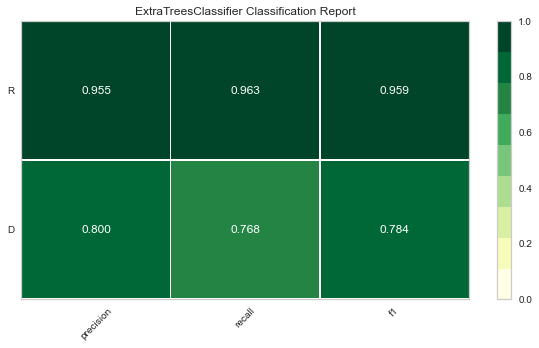

F1 SCORE RandomForestClassifier: 0.9671179883945841
0.9442622950819672


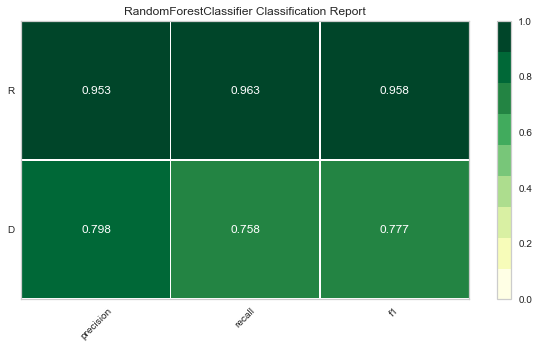

In [99]:
#Min_Max Scaler only int
#Performs Better:
### LinearSVC, SGD, LogisticRegressionCV, Bagging, ExtraTrees
for model in models:
    minmaxscore(X, y, model)
    visualizeminmax(X, y, model)

F1 SCORE SVC: 0.9663137632338787
0.9426229508196722


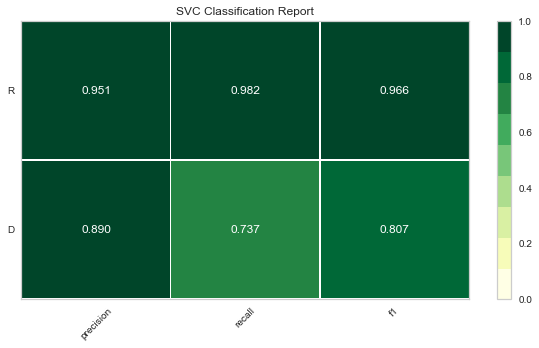

F1 SCORE LinearSVC: 0.9701060752169721
0.9491803278688524


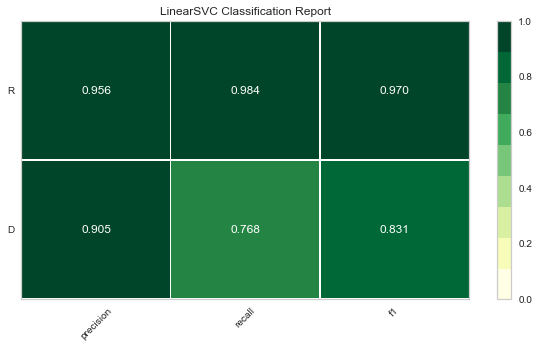

F1 SCORE SGDClassifier: 0.970334928229665
0.9491803278688524


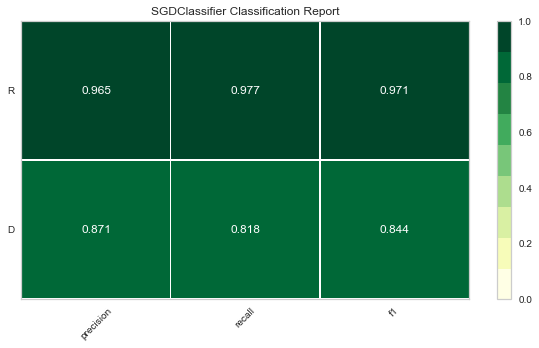

F1 SCORE KNeighborsClassifier: 0.9634615384615385
0.9377049180327869


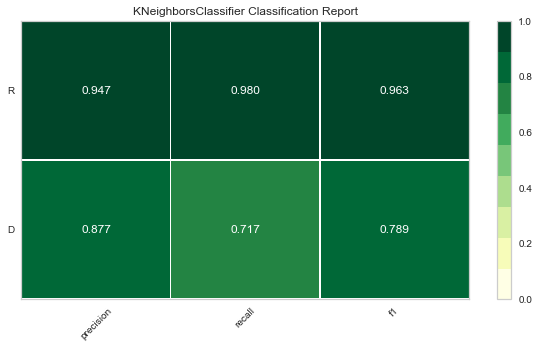

F1 SCORE LogisticRegression: 0.9673704414587332
0.9442622950819672


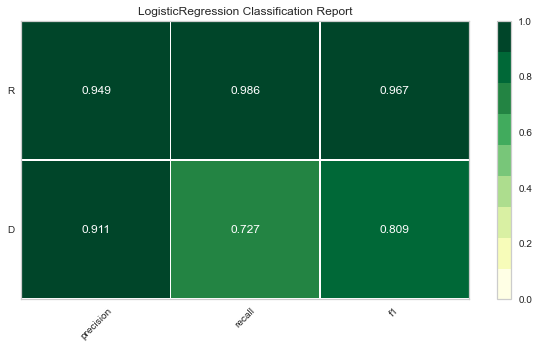

F1 SCORE LogisticRegressionCV: 0.9689922480620154
0.9475409836065574


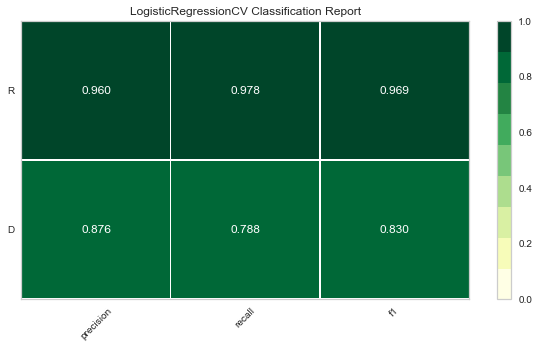

F1 SCORE BaggingClassifier: 0.9551656920077973
0.9245901639344263


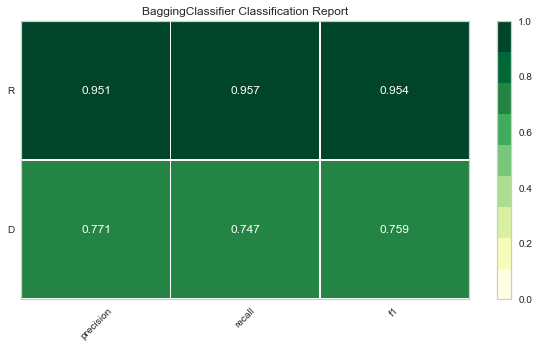

F1 SCORE ExtraTreesClassifier: 0.9600778967867575
0.9327868852459016


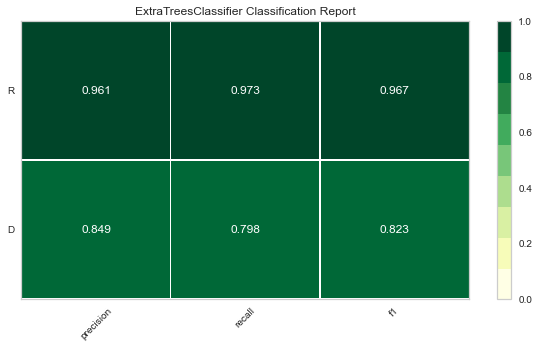

F1 SCORE RandomForestClassifier: 0.9610136452241715
0.9344262295081968


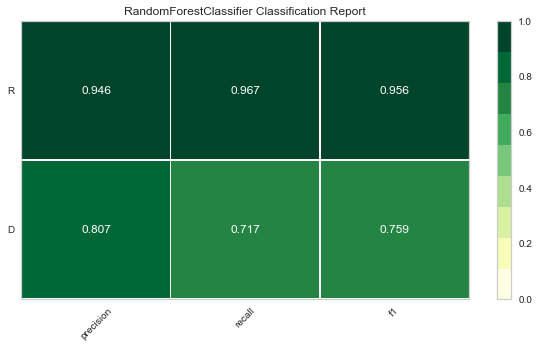

In [100]:
#Min_Max Scaler on both int and float
#Performs Best:
###SVC, Kneighbors

for model in models:
    minmaxscoreall(X, y, model)
    visualizeminmaxall(X, y, model)

In [101]:
#df1.info()

# Power Transformer

In [102]:
from sklearn.preprocessing import PowerTransformer

In [103]:
def powerscore(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    #setup pipeline for onehotcoder and scalar
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', PowerTransformer(), numeric),
        ('scalar2', RobustScaler(), numeric2),
    ], remainder='drop')),
    ('estimator', estimator)
])

    
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, random_state=11)
    
    model.fit(X_train, y_train)  
    
    
    # Instantiate the classification model and visualizer

    expected  = y_test
    predicted = model.predict(X_test)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("F1 SCORE {}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))
    print(model.score(X_test, y_test))
    
def visualizepower(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', PowerTransformer(), numeric),
        ('scalar2', RobustScaler(), numeric2),
    ], remainder='drop')),
    ('estimator', estimator)
])

    # Instantiate the classification model and visualizer, can change for any visualizer in Yellow Brick
    visualizer = ClassificationReport(
        model, classes=['D', 'R'],
        cmap="YlGn", size=(600, 360), **kwargs
    )
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, random_state=11)
    
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)
    visualizer.show()  
    
from sklearn.pipeline import Pipeline
from yellowbrick.classifier import ClassificationReport
def powerscoreall(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    #setup pipeline for onehotcoder and scalar
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', PowerTransformer(), numeric),
        ('scalar2', PowerTransformer(), numeric2),
    ], remainder='drop')),
    ('estimator', estimator)
])

    
    
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, random_state=11)
    
    model.fit(X_train, y_train)  
    
    
    # Instantiate the classification model and visualizer

    expected  = y_test
    predicted = model.predict(X_test)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("F1 SCORE {}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))
    print(model.score(X_test, y_test))
    
def visualizepowerall(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', PowerTransformer(), numeric),
        ('scalar2', PowerTransformer(), numeric2),
    ], remainder='drop')),
    ('estimator', estimator)
])

    # Instantiate the classification model and visualizer, can change for any visualizer in Yellow Brick
    visualizer = ClassificationReport(
        model, classes=['D', 'R'],
        cmap="YlGn", size=(600, 360), **kwargs
    )
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, random_state=11)
    
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)
    visualizer.show()  

F1 SCORE SVC: 0.9458955223880596
0.9049180327868852


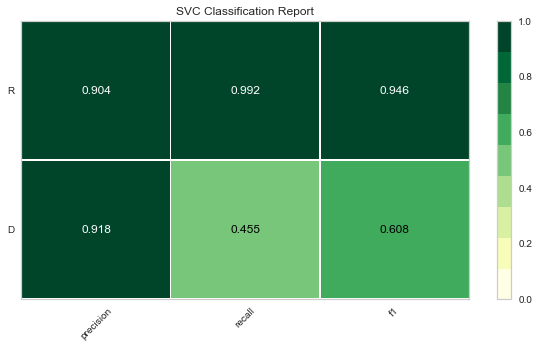

F1 SCORE LinearSVC: 0.9642512077294686
0.9393442622950819


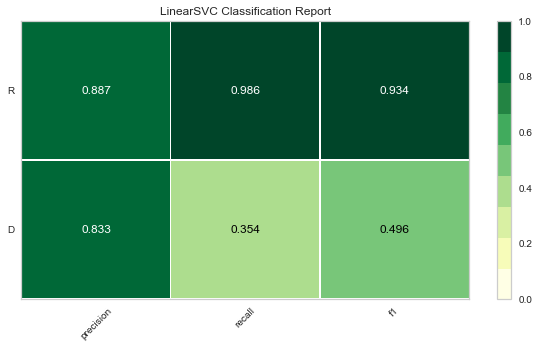

F1 SCORE SGDClassifier: 0.9538763493621197
0.9229508196721311


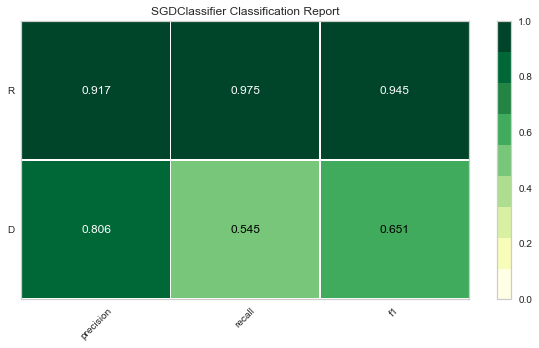

F1 SCORE KNeighborsClassifier: 0.9547641963426371
0.9229508196721311


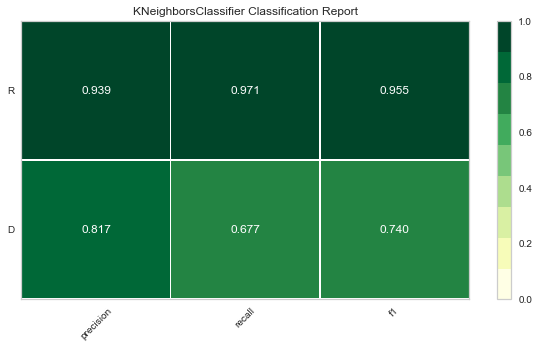

F1 SCORE LogisticRegression: 0.9679300291545189
0.9459016393442623


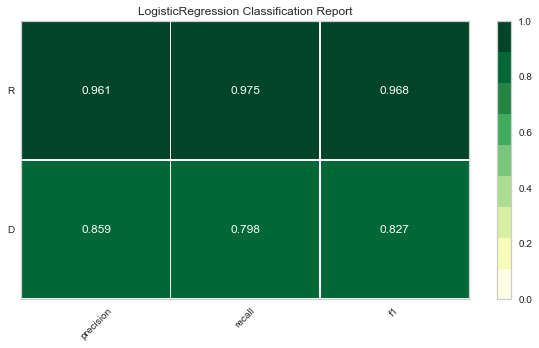

F1 SCORE LogisticRegressionCV: 0.9659863945578231
0.9426229508196722


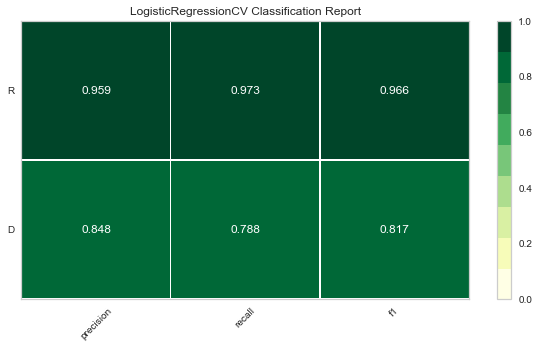

F1 SCORE BaggingClassifier: 0.9544131910766246
0.9229508196721311


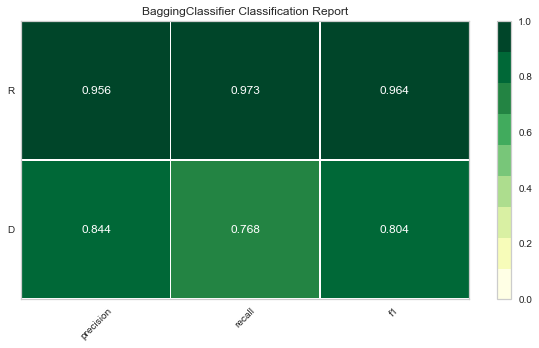

F1 SCORE ExtraTreesClassifier: 0.9582118561710399
0.9295081967213115


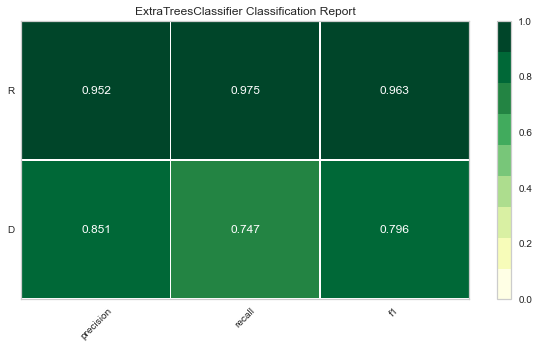

F1 SCORE RandomForestClassifier: 0.9594594594594594
0.9311475409836065


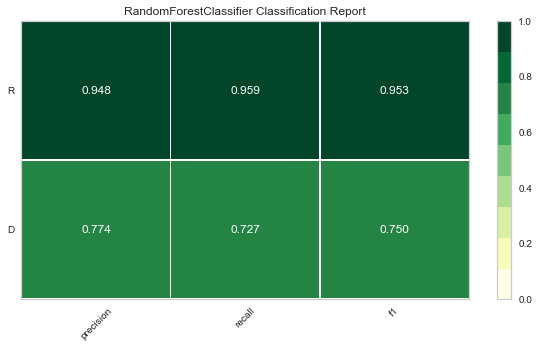

In [104]:
#robust (Original)

#Wins LinearSVC, SGD, Logistics, Bagging
for model in models:
    score_model_test(X, y, model)
    visualize_model_split(X, y, model)

F1 SCORE SVC: 0.9627507163323782
0.9360655737704918


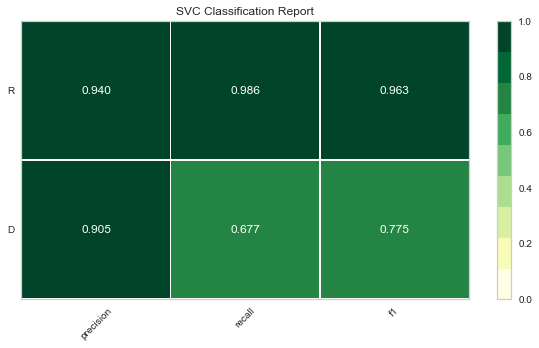

F1 SCORE LinearSVC: 0.9672447013487475
0.9442622950819672


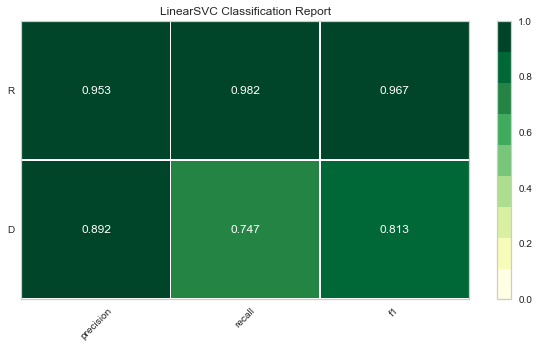

F1 SCORE SGDClassifier: 0.9493545183714003
0.9163934426229509


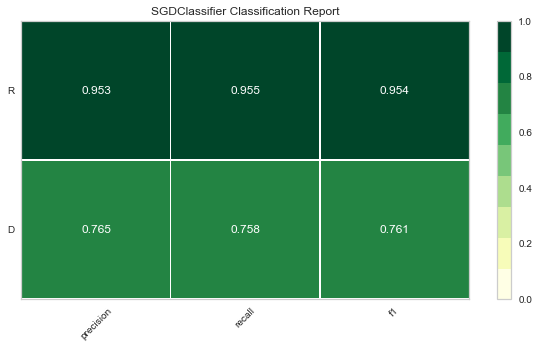

F1 SCORE KNeighborsClassifier: 0.9589302769818528
0.9295081967213115


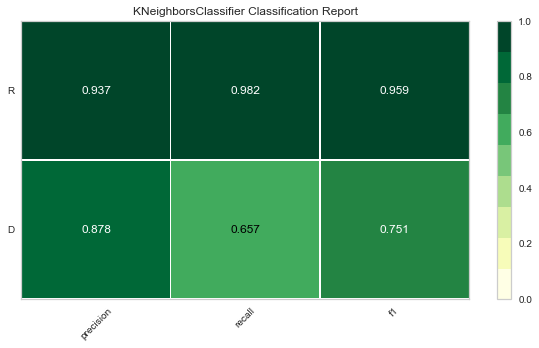

F1 SCORE LogisticRegression: 0.9652509652509652
0.940983606557377


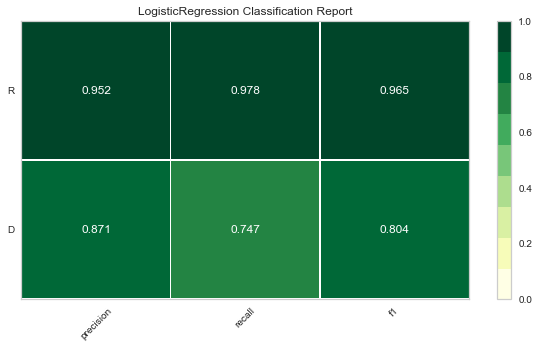

F1 SCORE LogisticRegressionCV: 0.9681159420289855
0.9459016393442623


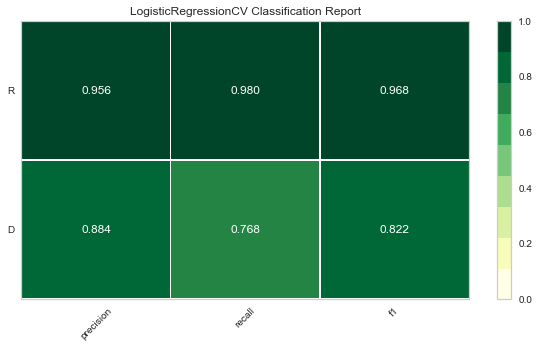

F1 SCORE BaggingClassifier: 0.9647749510763209
0.940983606557377


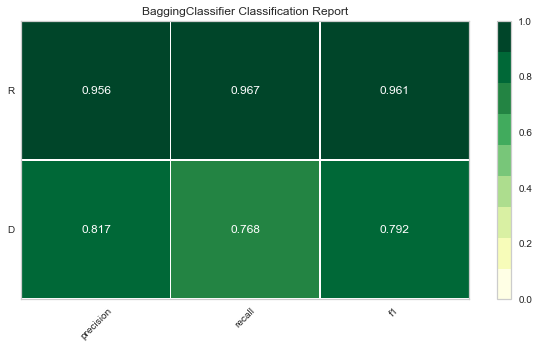

F1 SCORE ExtraTreesClassifier: 0.9671179883945841
0.9442622950819672


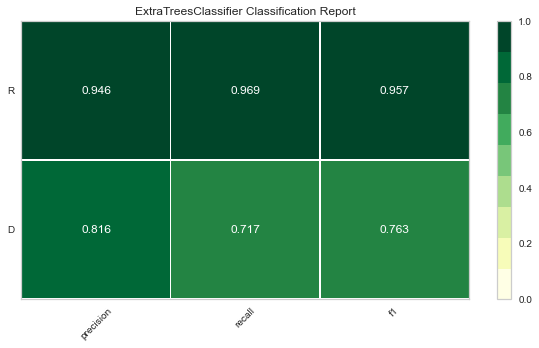

F1 SCORE RandomForestClassifier: 0.962172647914646
0.9360655737704918


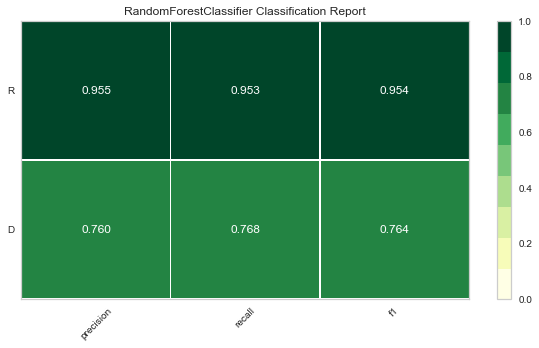

In [105]:
#Power Transformer
#Wins KNeighbors, LogisticRegressionCV, ExtraTrees

for model in models:
    powerscore(X, y, model)
    visualizepower(X, y, model)

F1 SCORE SVC: 0.9710424710424711
0.9508196721311475


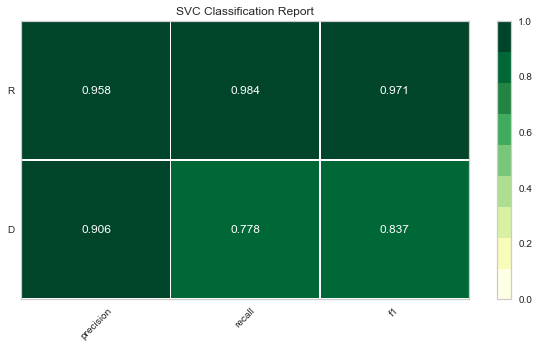

F1 SCORE LinearSVC: 0.9642512077294686
0.9393442622950819


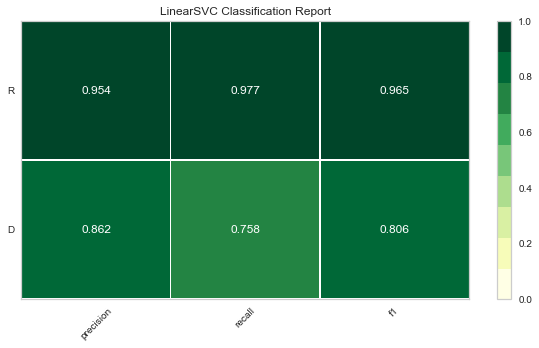

F1 SCORE SGDClassifier: 0.9345971563981043
0.8868852459016393


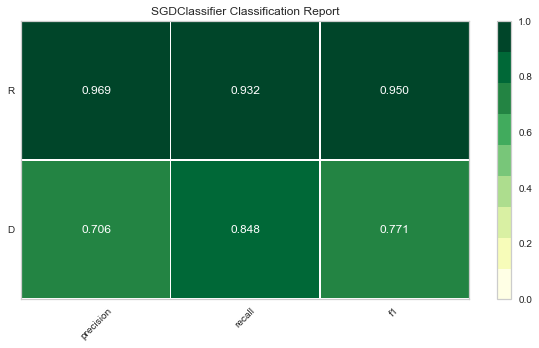

F1 SCORE KNeighborsClassifier: 0.9633911368015414
0.9377049180327869


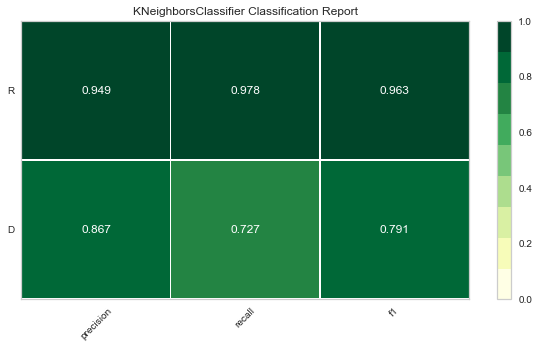

F1 SCORE LogisticRegression: 0.9661835748792271
0.9426229508196722


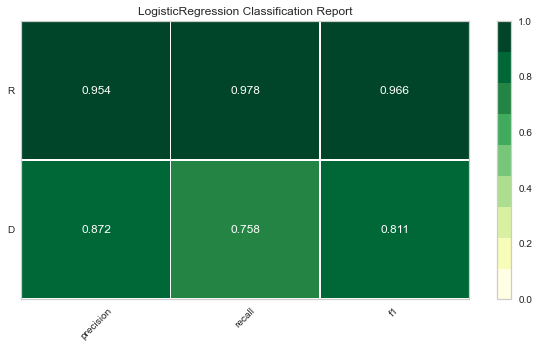

F1 SCORE LogisticRegressionCV: 0.9660523763336566
0.9426229508196722


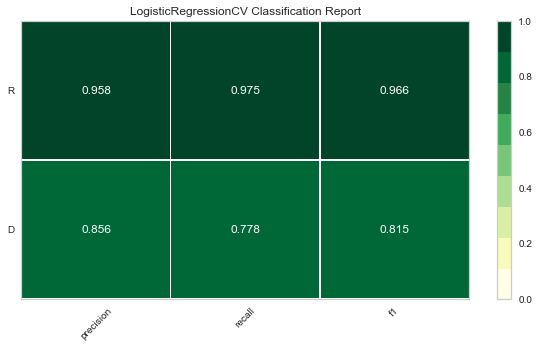

F1 SCORE BaggingClassifier: 0.9601554907677357
0.9327868852459016


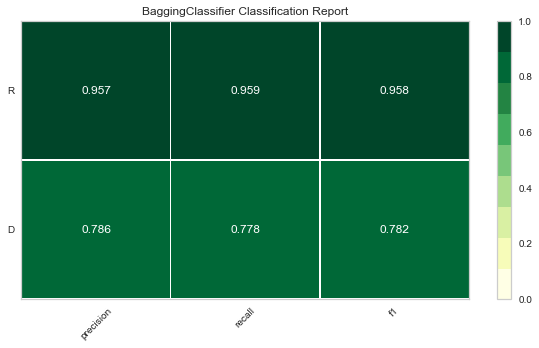

F1 SCORE ExtraTreesClassifier: 0.9638318670576734
0.9393442622950819


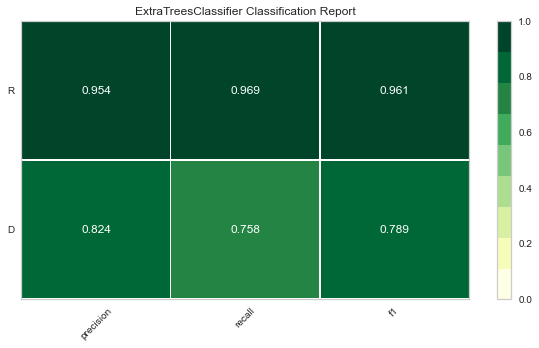

F1 SCORE RandomForestClassifier: 0.9652509652509652
0.940983606557377


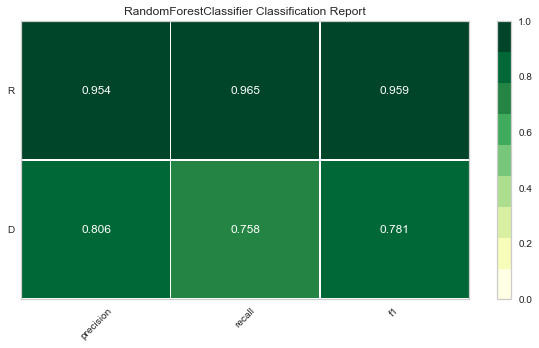

In [106]:
#Power Scaler (Both int and float)

#Wins SVC, RandomForest
for model in models:
    powerscoreall(X, y, model)
    visualizepowerall(X, y, model)

# Quantile Transformer

In [107]:
from sklearn.preprocessing import QuantileTransformer

In [108]:

def quantilescore(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    #setup pipeline for onehotcoder and scalar
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', QuantileTransformer(), numeric),
        ('scalar2', RobustScaler(), numeric2),
    ], remainder='drop')),
    ('estimator', estimator)
])

    
    
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, random_state=11)
    
    model.fit(X_train, y_train)  
    
    
    # Instantiate the classification model and visualizer

    expected  = y_test
    predicted = model.predict(X_test)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("F1 SCORE {}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))
    print(model.score(X_test, y_test))
    
def visualizequantile(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', QuantileTransformer(), numeric),
        ('scalar2', RobustScaler(), numeric2),
    ], remainder='drop')),
    ('estimator', estimator)
])

    # Instantiate the classification model and visualizer, can change for any visualizer in Yellow Brick
    visualizer = ClassificationReport(
        model, classes=['D', 'R'],
        cmap="YlGn", size=(600, 360), **kwargs
    )
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, random_state=11)
    
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)
    visualizer.show()  
    
    

def quantilescoreall(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    #setup pipeline for onehotcoder and scalar
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', QuantileTransformer(), numeric),
        ('scalar2', QuantileTransformer(), numeric2),
    ], remainder='drop')),
    ('estimator', estimator)
])

    
    
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, random_state=11)
    
    model.fit(X_train, y_train)  
    
    
    # Instantiate the classification model and visualizer

    expected  = y_test
    predicted = model.predict(X_test)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("F1 SCORE {}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))
    print(model.score(X_test, y_test))
    
def visualizequantileall(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
    ("columns", ColumnTransformer([
        ('onehot', OneHotEncoder(), categorical),
        ('scalar', QuantileTransformer(), numeric),
        ('scalar2', QuantileTransformer(), numeric2),
    ], remainder='drop')),
    ('estimator', estimator)
])

    # Instantiate the classification model and visualizer, can change for any visualizer in Yellow Brick
    visualizer = ClassificationReport(
        model, classes=['D', 'R'],
        cmap="YlGn", size=(600, 360), **kwargs
    )
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, random_state=11)
    
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)
    visualizer.show()  

F1 SCORE SVC: 0.9458955223880596
0.9049180327868852


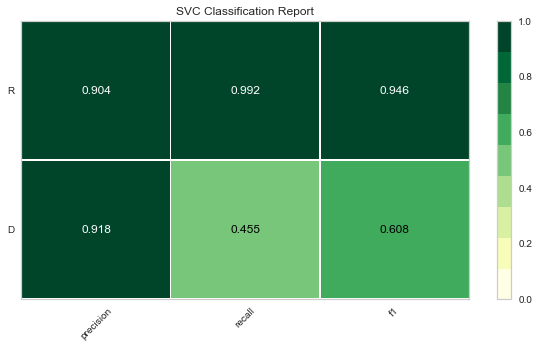

F1 SCORE LinearSVC: 0.9649122807017544
0.940983606557377


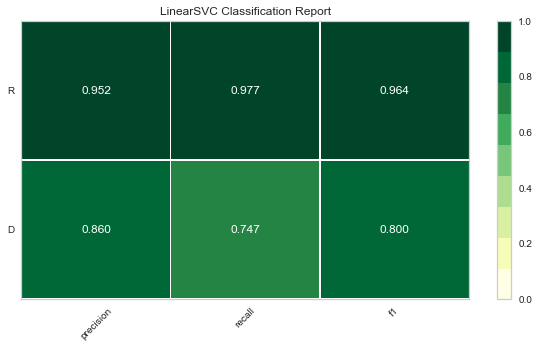

F1 SCORE SGDClassifier: 0.954110898661568
0.921311475409836


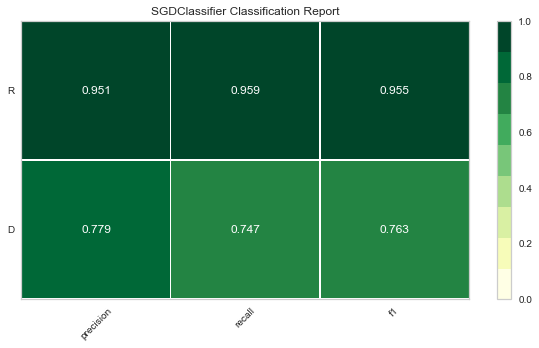

F1 SCORE KNeighborsClassifier: 0.9547641963426371
0.9229508196721311


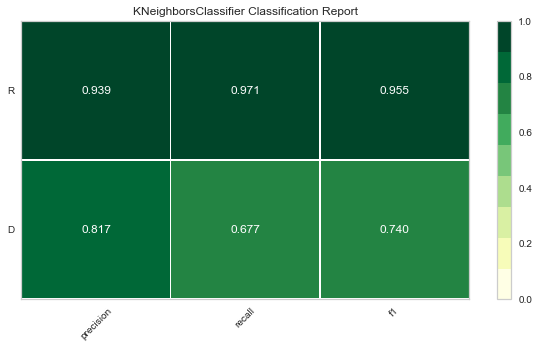

F1 SCORE LogisticRegression: 0.9679300291545189
0.9459016393442623


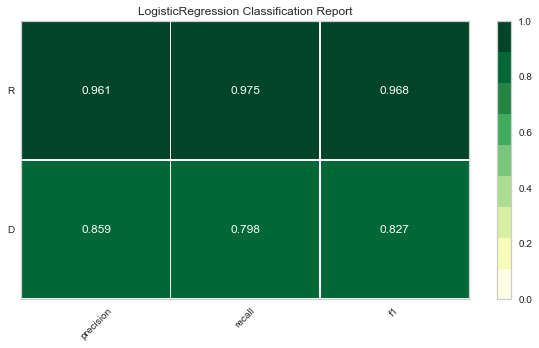

F1 SCORE LogisticRegressionCV: 0.9659863945578231
0.9426229508196722


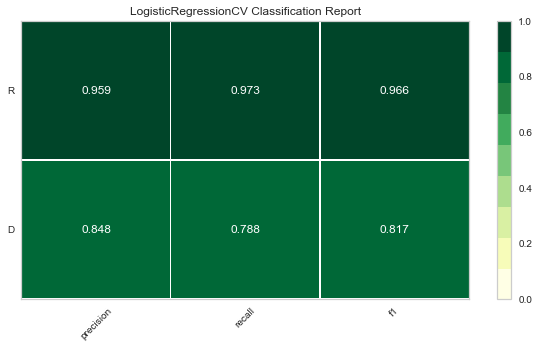

F1 SCORE BaggingClassifier: 0.958904109589041
0.9311475409836065


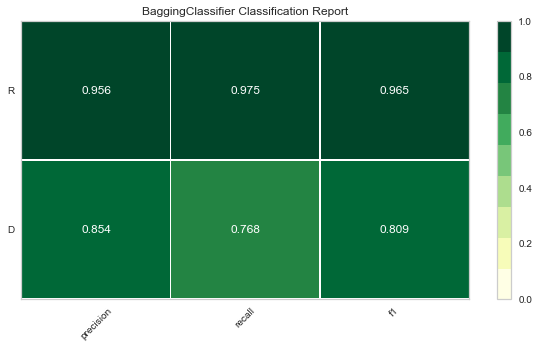

F1 SCORE ExtraTreesClassifier: 0.9560975609756098
0.9262295081967213


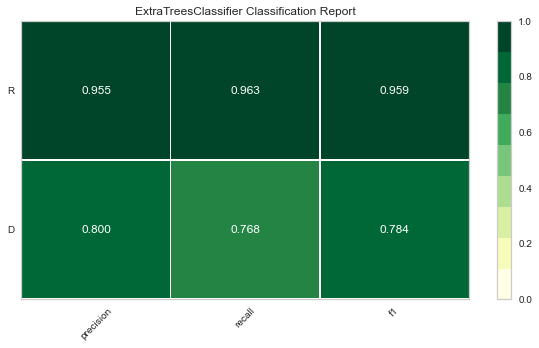

F1 SCORE RandomForestClassifier: 0.9659201557935736
0.9426229508196722


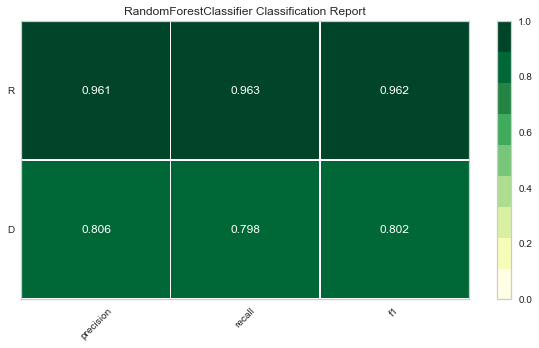

In [109]:
#Original Robust 
for model in models:
    score_model_test(X, y, model)
    visualize_model_split(X, y, model)

F1 SCORE SVC: 0.9598470363288718
0.9311475409836065


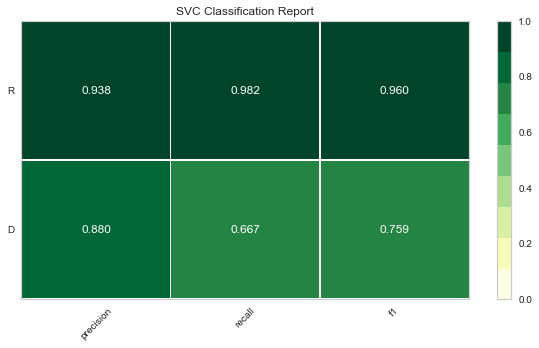

F1 SCORE LinearSVC: 0.968054211035818
0.9459016393442623


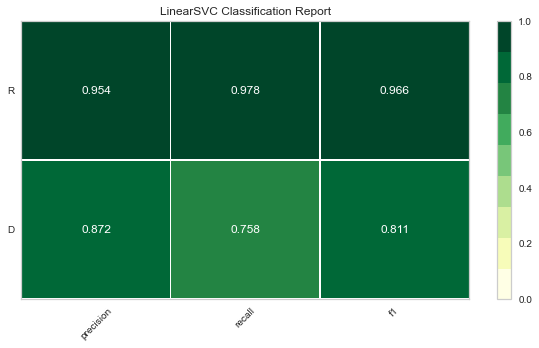

F1 SCORE SGDClassifier: 0.9524752475247524
0.921311475409836


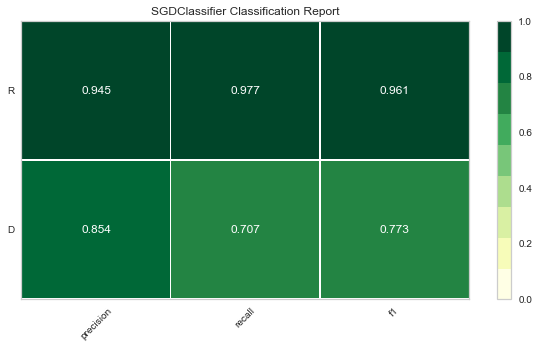

F1 SCORE KNeighborsClassifier: 0.954110898661568
0.921311475409836


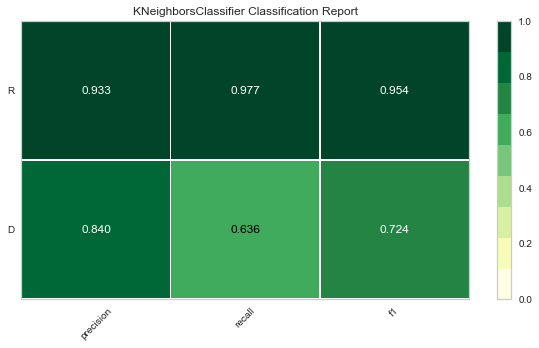

F1 SCORE LogisticRegression: 0.9661835748792271
0.9426229508196722


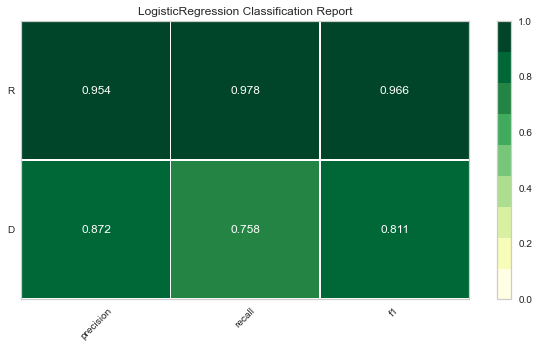

F1 SCORE LogisticRegressionCV: 0.9670542635658915
0.9442622950819672


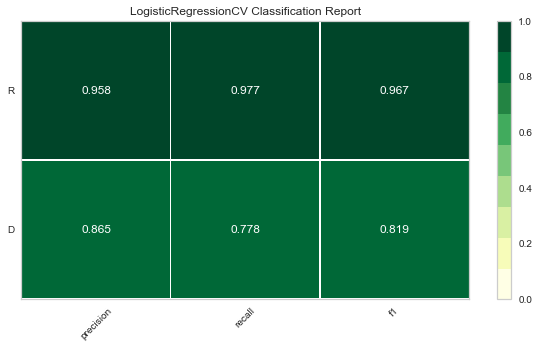

F1 SCORE BaggingClassifier: 0.9573643410852714
0.9278688524590164


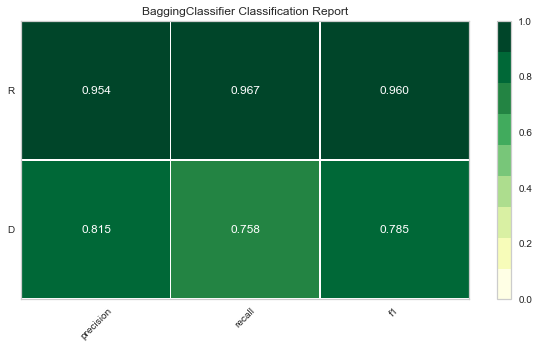

F1 SCORE ExtraTreesClassifier: 0.9598432908912831
0.9327868852459016


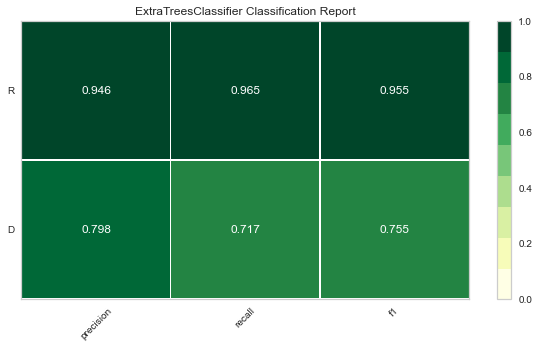

F1 SCORE RandomForestClassifier: 0.9582929194956353
0.9295081967213115


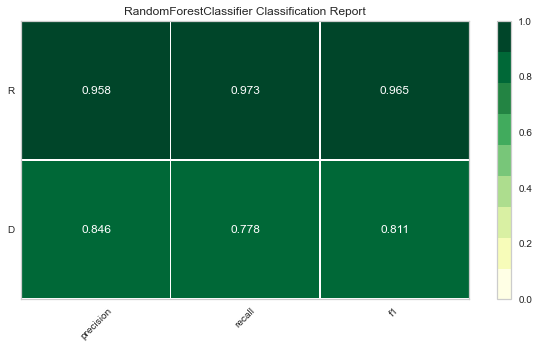

In [110]:
#Quantile Transformer
#Better on: 
##### SVC, LinearSVC, KNeighbors LogisticRegressionCV, 
for model in models:
    quantilescore(X, y, model)
    visualizequantile(X, y, model)

F1 SCORE SVC: 0.9643201542912246
0.9393442622950819


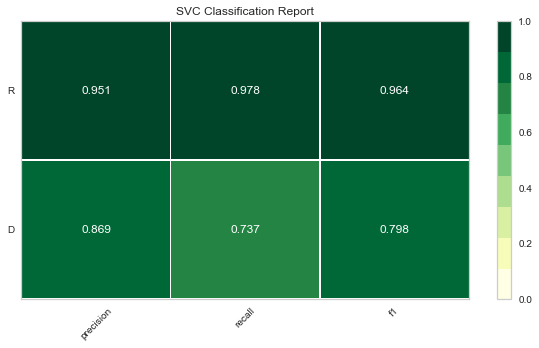

F1 SCORE LinearSVC: 0.9604628736740597
0.9327868852459016


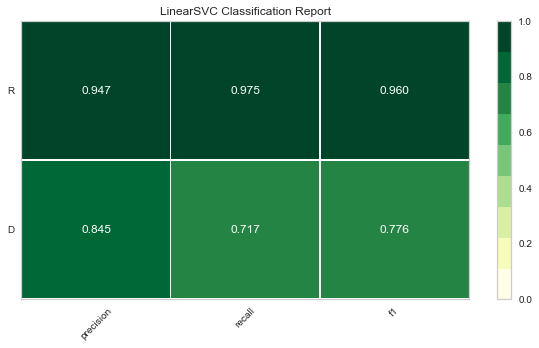

F1 SCORE SGDClassifier: 0.9401015228426396
0.9032786885245901


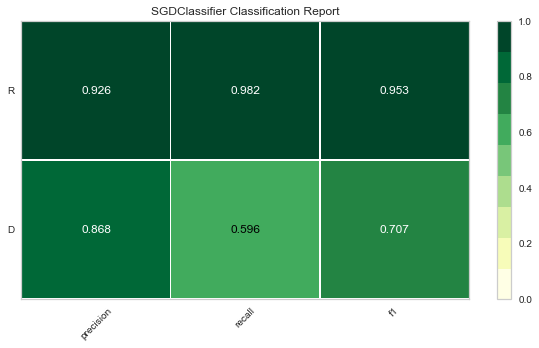

F1 SCORE KNeighborsClassifier: 0.9499036608863198
0.9147540983606557


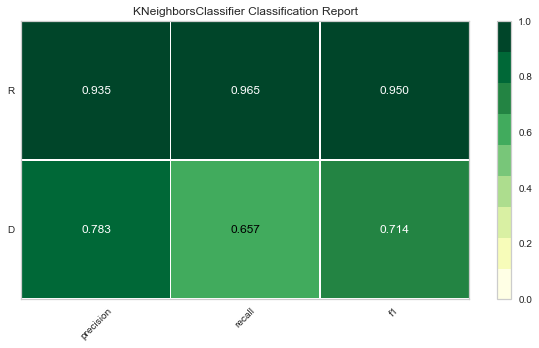

F1 SCORE LogisticRegression: 0.9550239234449761
0.9229508196721311


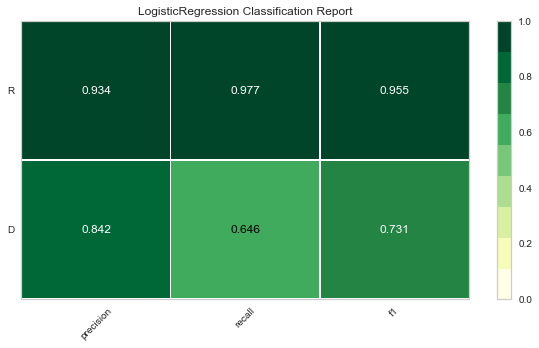

F1 SCORE LogisticRegressionCV: 0.9592233009708738
0.9311475409836065


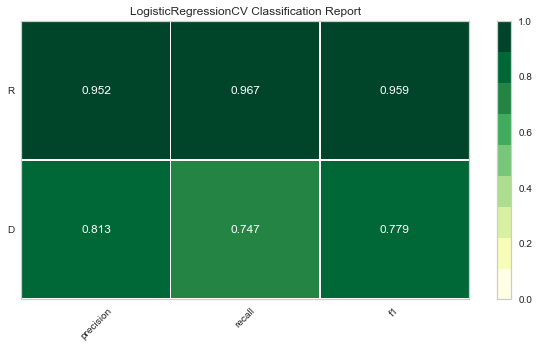

F1 SCORE BaggingClassifier: 0.9631067961165048
0.9377049180327869


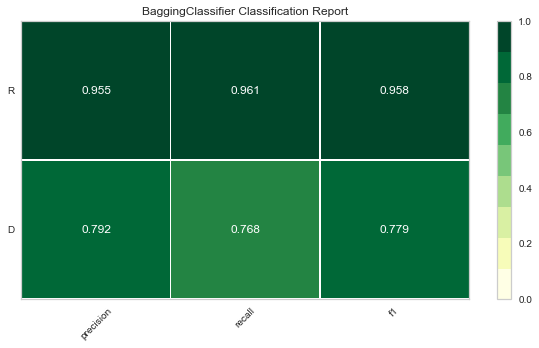

F1 SCORE ExtraTreesClassifier: 0.958614051973051
0.9295081967213115


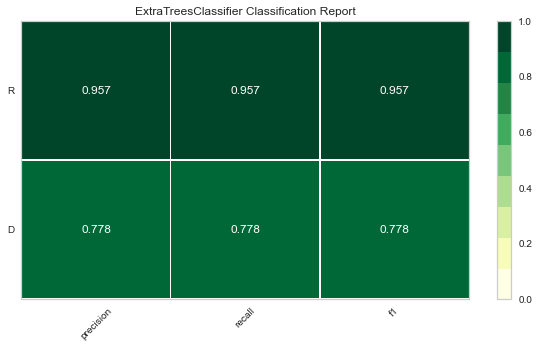

F1 SCORE RandomForestClassifier: 0.958048780487805
0.9295081967213115


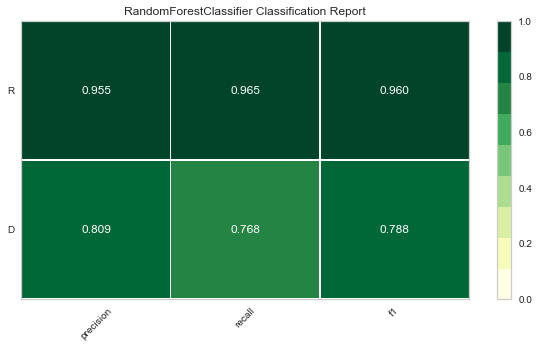

In [111]:
#Quantile transformer all

#performs worse than on just int

for model in models:
    quantilescoreall(X, y, model)
    visualizequantileall(X, y, model)

In Analyzing different transformers, and their affects on the models, it seems as if all of them could potenially be tuned to perform well after feature reduction. However, the LogisticRegression, LogisticRegressionCV, and BaggingClassifer all performed particularly well among all of them, so we will start with these three models

In [86]:
#Linear SVC + MinMax Scaler and Robust
#Logistic Regression CV + performs best with single Quartile Scaler, other is Robust